# Proyecto Aprendizaje Profundo - Modelo 2: Algoritmo ResNet

Yuu Ricardo Akachi Tanaka | A01351969

Pablo Monzón Terrazas | A01562619

Donnet Emmanuel Hernández Franco | A01352049

## Importar librerías

In [1]:
# Tensorflow y Keras
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerías de ayuda
import numpy as np
import matplotlib.pyplot as plt

## Cargar base de datos y Split train y test set

In [2]:
# Cargar los datos Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Preparación de los datos

In [3]:
# Normalizar los datos a escala [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Expandir las dimensiones de los datos para ser compatibles con convoluciones
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Codificar las etiquetas en formato one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Bloques Residuales

In [4]:
# Definir una función para crear bloques residuales
def residual_block(x, filters, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=(3, 3), strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    if stride > 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=stride, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

## Arquitectura de ResNet

In [5]:
# Definir la arquitectura de la ResNet
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(64, kernel_size=(7, 7), strides=2, padding='same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)
x = AveragePooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

num_blocks = 4  # Número de bloques residuales
for _ in range(num_blocks):
    x = residual_block(x, filters=64)

x = AveragePooling2D(pool_size=(7, 7))(x)
x = Flatten()(x)
output_layer = Dense(10, activation='softmax')(x)

## Modelo 2: ResNet

In [6]:
# Crear el modelo ResNet
resnet_model = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 64)           3200      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 14, 14, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 14, 14, 64)           0         ['batch_normalization[0][0

## Entrenamiento del modelo

In [8]:
# Entrenar el modelo
History = resnet_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 26s 13ms/step - loss: 0.4749 - accuracy: 0.8218 - val_loss: 0.6164 - val_accuracy: 0.7759
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.3292 - accuracy: 0.8782 - val_loss: 0.6363 - val_accuracy: 0.7742
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2910 - accuracy: 0.8920 - val_loss: 0.4244 - val_accuracy: 0.8540
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2685 - accuracy: 0.9006 - val_loss: 0.4205 - val_accuracy: 0.8349
Epoch 5/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2454 - accuracy: 0.9091 - val_loss: 0.3298 - val_accuracy: 0.8852
Epoch 6/10
938/938 [==============================] - 11s 12ms/step - loss: 0.2305 - accuracy: 0.9152 - val_loss: 0.3246 - val_accuracy: 0.8878
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2165 - accuracy: 0.9193 - val_loss: 0.3036 - val_accuracy: 

## Evaluación del modelo

In [9]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = resnet_model.evaluate(x_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3103 - accuracy: 0.8890
Pérdida en el conjunto de prueba: 0.31025683879852295
Precisión en el conjunto de prueba: 0.8889999985694885


## Métricas de entrenamiento

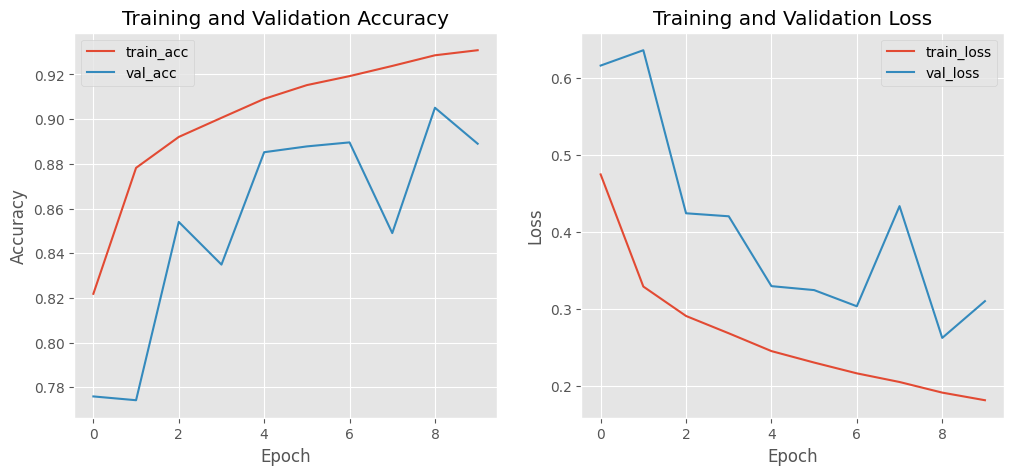

In [10]:
H = History
plt.style.use("ggplot")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Métricas de clasificación

In [11]:
y_pred = resnet_model.predict(x_test)

# Obtener las etiquetas predichas en forma de clases
y_pred_clases = np.argmax(y_pred, axis=1)
y_true_clases = np.argmax(y_test, axis=1)  # Si 'y_true' es one-hot encoded

# Generar el informe de clasificación
clases=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
reporte = classification_report(y_true_clases, y_pred_clases, target_names=clases)

# Imprimir el informe
print(reporte)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

     T-shirt       0.87      0.80      0.84      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.89      0.81      0.85      1000
       Dress       0.88      0.93      0.90      1000
        Coat       0.91      0.71      0.80      1000
      Sandal       0.96      0.99      0.97      1000
       Shirt       0.60      0.85      0.71      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.99      0.94      0.96      1000
  Ankle Boot       0.99      0.92      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



## Matriz de confusión

<Axes: >

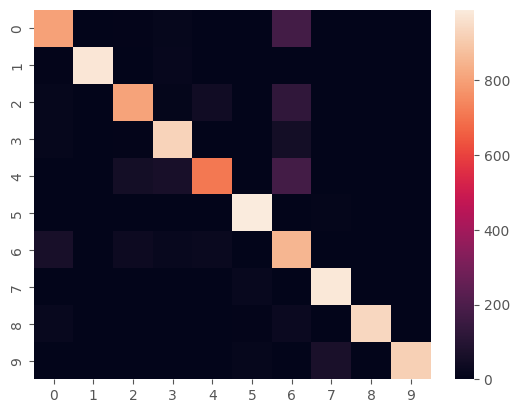

In [12]:
import seaborn as sns

conf_mat = confusion_matrix(y_true_clases, y_pred_clases)
sns.heatmap(conf_mat)

## Predicciones

In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(clases[int(predicted_label)],
                                100*np.max(predictions_array),
                                clases[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[int(predicted_label)].set_color('red')
  thisplot[int(true_label)].set_color('blue')

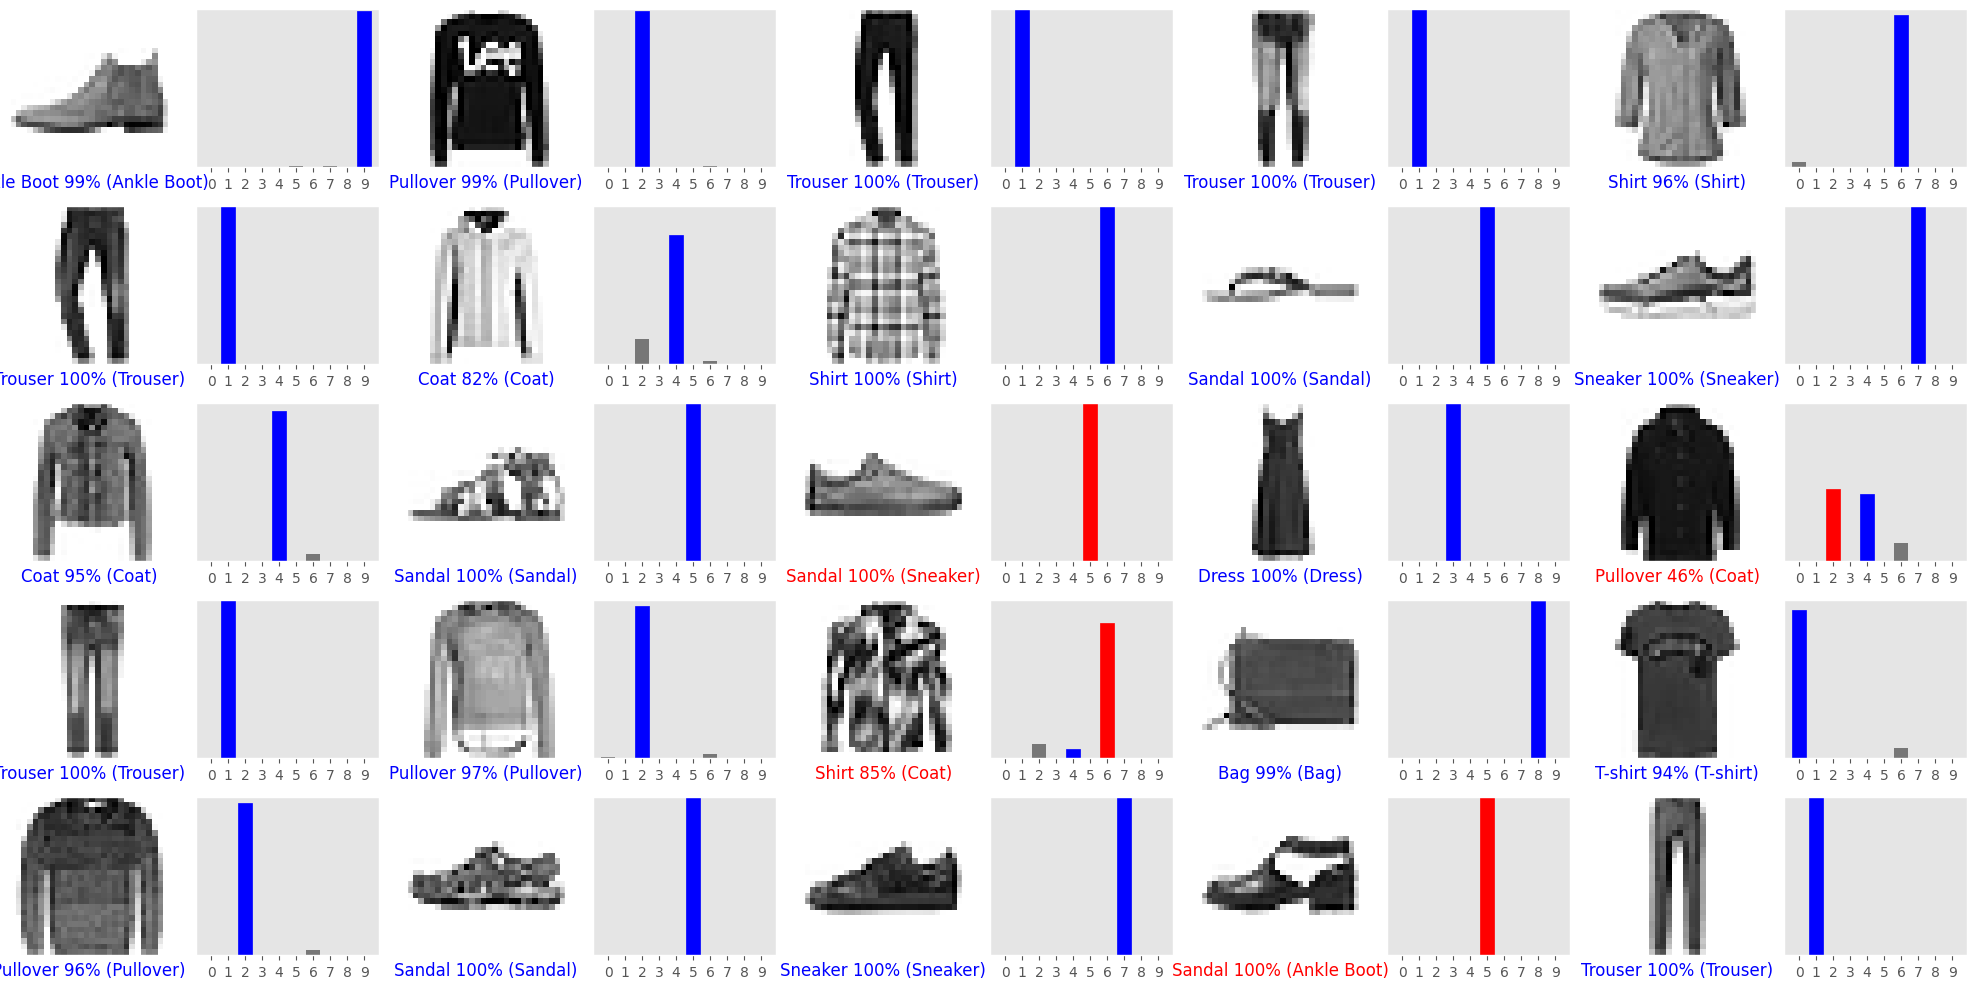

In [14]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
y_true_classes = np.argmax(y_test, axis=1)

num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_pred[i], y_true_classes, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_pred[i], y_true_classes)
plt.tight_layout()
plt.show()